# CUSTOMER SEGMENTATION ANALYSIS WITH PYTHON

In [2]:
#importing the data analysis libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


## Loading the Data

In [3]:
import chardet # using it to detect the csv file encoding
import pandas as pd

with open('data.csv', 'rb') as f:
    rows = f.read()

detected_encoding = chardet.detect(rows)
encoding = detected_encoding.get('encoding')

df = pd.read_csv('data.csv', encoding=encoding)

## Understanding and Cleaning the Data

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
#describing the data
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 193.8 MB


In [19]:
#converting the InvoiceDate column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [15]:
#getting the summary statistics for numerical columns in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00


In [7]:
#checking if the dataset has any null or missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The number of null values in Customer Id is alot and since i cannot replace the missing values with either the mode or median as that would be a wrong assumption to make i have decided to delete the rows that have null 
values in the customer id column

In [8]:
#dropping rows that have null values in customerID column
df.dropna(subset=['CustomerID'], inplace=True)

In [9]:
#checking for null values again
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
#checking for duplicates
df.duplicated().sum()

5225

In [11]:
#dropping duplicated values
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Outliers in the Quantit column: 
0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: Quantity, Length: 406829, dtype: bool

Outliers in Unit Price column
0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: UnitPrice, Length: 406829, dtype: bool


<Axes: >

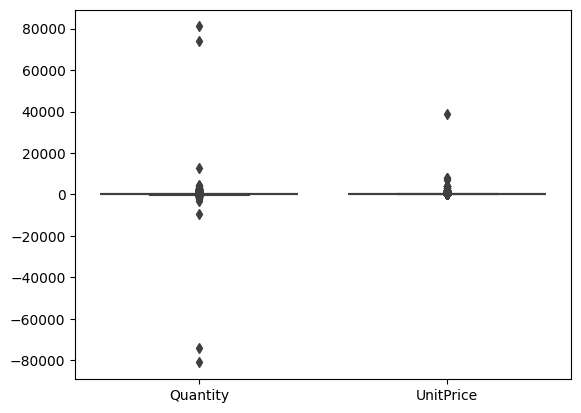

In [12]:
#checking for outliers using Z score
from scipy import stats

#calculating the zscore for quantity and unitprice
z_scores_quantity = stats.zscore(df['Quantity'])
z_scores_unitprice = stats.zscore(df['UnitPrice'])

#defining the threshold for outliers
threshold = 3

##identifying the outliers
outliers_quantity = z_scores_quantity > threshold
outliers_unitprice = z_scores_unitprice > threshold

print("Outliers in the Quantit column: ")
print(outliers_quantity)
print("\nOutliers in Unit Price column")
print(outliers_unitprice)

#boxplot to visualize outliers
sns.boxplot(data=df[['Quantity', 'UnitPrice']])

It makes no sense that there would be a negative value for quantity so i am removing the rows where
Quantity is less than 0

In [13]:
df = df[df['Quantity'] > 0]

In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


## Exploratory Data Analysis

In [17]:
#checking the number of unique values in the description column
df['Description'].nunique()

3877

In [18]:
#checking the number of unique values in the customer id column
df['CustomerID'].nunique()

4339

In [56]:
#grouping the data to calculate customer recency
recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()

#calculating recency
recency['recency'] = recency['InvoiceDate'].max() - recency['InvoiceDate']

#converting recency to days
recency['recency'] = recency['recency'].dt.days

recency.head()

,CustomerID,InvoiceDate,recency
0,12346.0,2011-01-18 10:01:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


In [57]:
#grouping the data to calculate customer frequency
frequency = df.groupby('CustomerID').size().reset_index(name='Frequency')
frequency.columns = ['CustomerID', 'Frequency']

frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [58]:
#creating a column in df named TotalPrice
#this is to calculate the product of Quantity and UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

#grouping the data tpo calculate customer monetary value
monetary = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()

monetary.columns = ['CustomerID','Monetary']
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [59]:
#merging recency, frequency and monetary into one dataframe
rfm = recency.merge(frequency, on='CustomerID', how='left')
rfm = rfm.merge(monetary, on='CustomerID', how='left')

rfm

,CustomerID,InvoiceDate,recency,Frequency,Monetary
0,12346.0,2011-01-18 10:01:00,325,1,77183.60
1,12347.0,2011-12-07 15:52:00,1,182,4310.00
2,12348.0,2011-09-25 13:13:00,74,31,1797.24
3,12349.0,2011-11-21 09:51:00,18,73,1757.55
4,12350.0,2011-02-02 16:01:00,309,17,334.40
...,...,...,...,...,...
4334,18280.0,2011-03-07 09:52:00,277,10,180.60
4335,18281.0,2011-06-12 10:53:00,180,7,80.82
4336,18282.0,2011-12-02 11:43:00,7,12,178.05
4337,18283.0,2011-12-06 12:02:00,3,756,2094.88


In [61]:
#sorting the dataframe by calculating ranks and normalizing them
rfm['R_rank'] = rfm['recency'].rank(ascending=False)
rfm['F_rank'] = rfm['Frequency'].rank(ascending=True)
rfm['M_rank'] = rfm['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['F_rank']/rfm['M_rank'].max())*100

rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm.head()

,CustomerID,InvoiceDate,recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,2011-01-18 10:01:00,325,1,77183.60,3.750291,0.841208,0.841208
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,97.915211,88.107859,88.107859
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,38.504542,42.118000,42.118000
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,74.120662,66.570638,66.570638
4,12350.0,2011-02-02 16:01:00,309,17,334.40,5.369206,24.925098,24.925098


In [62]:
#calculating the RFM score
rfm['RFM_Score'] = 0.15*rfm['R_rank_norm']+0.28 * rfm['F_rank_norm']+0.57*rfm['M_rank_norm']

rfm['RFM_Score'] *= 0.1
#rounding the score
rfm = rfm.round(2)

rfm.head(10)

,CustomerID,InvoiceDate,recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,12346.0,2011-01-18 10:01:00,325,1,77183.60,3.75,0.84,0.84,0.13
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,97.92,88.11,88.11,8.96
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,38.50,42.12,42.12,4.16
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,74.12,66.57,66.57,6.77
4,12350.0,2011-02-02 16:01:00,309,17,334.40,5.37,24.93,24.93,2.20
5,12352.0,2011-11-03 14:37:00,35,85,2506.04,58.64,70.55,70.55,6.88
6,12353.0,2011-05-19 17:47:00,203,4,89.00,16.98,4.71,4.71,0.66
7,12354.0,2011-04-21 13:11:00,231,58,1079.40,14.05,59.98,59.98,5.31
8,12355.0,2011-05-09 13:49:00,213,13,459.40,15.72,19.20,19.20,1.87
9,12356.0,2011-11-17 08:40:00,22,59,2811.43,69.95,60.47,60.47,6.19


In [63]:
#value segmentation

#create rfm segments based on the RFM_Score
segment_labels = ['Low Value', 'Mid Value', 'High Value']
rfm['RFM_Segment'] = pd.qcut(rfm['RFM_Score'], q=3, labels=segment_labels)
rfm

,CustomerID,InvoiceDate,recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,RFM_Segment
0,12346.0,2011-01-18 10:01:00,325,1,77183.60,3.75,0.84,0.84,0.13,Low Value
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,97.92,88.11,88.11,8.96,High Value
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,38.50,42.12,42.12,4.16,Mid Value
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,74.12,66.57,66.57,6.77,High Value
4,12350.0,2011-02-02 16:01:00,309,17,334.40,5.37,24.93,24.93,2.20,Low Value
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,2011-03-07 09:52:00,277,10,180.60,8.22,14.35,14.35,1.34,Low Value
4335,18281.0,2011-06-12 10:53:00,180,7,80.82,20.02,9.38,9.38,1.10,Low Value
4336,18282.0,2011-12-02 11:43:00,7,12,178.05,88.41,17.72,17.72,2.83,Low Value
4337,18283.0,2011-12-06 12:02:00,3,756,2094.88,93.55,99.33,99.33,9.85,High Value


In [65]:
#customer segmentation

#defining segment labels
import numpy as np
conditions = [
    (rfm['RFM_Score'] >= 9),
    (rfm['RFM_Score'] >= 7) & (rfm['RFM_Score'] < 9),
    (rfm['RFM_Score'] >= 5) & (rfm['RFM_Score'] < 7),
    (rfm['RFM_Score'] >= 2) & (rfm['RFM_Score'] < 5),
     (rfm['RFM_Score'] < 2)
]

condition_labels = ['Champions', 'Potential Loyalists', "Can't Lose",
                    'At Risk Customers', 'Lost']

#creating a column 'Customer_segment'
rfm['customer_segment'] = np.select(conditions, condition_labels)

#checking the head of the dataframe
rfm.head(10)

,CustomerID,InvoiceDate,recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,RFM_Segment,customer_segment
0,12346.0,2011-01-18 10:01:00,325,1,77183.60,3.75,0.84,0.84,0.13,Low Value,Lost
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,97.92,88.11,88.11,8.96,High Value,Potential Loyalists
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,38.50,42.12,42.12,4.16,Mid Value,At Risk Customers
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,74.12,66.57,66.57,6.77,High Value,Can't Lose
4,12350.0,2011-02-02 16:01:00,309,17,334.40,5.37,24.93,24.93,2.20,Low Value,At Risk Customers
5,12352.0,2011-11-03 14:37:00,35,85,2506.04,58.64,70.55,70.55,6.88,High Value,Can't Lose
6,12353.0,2011-05-19 17:47:00,203,4,89.00,16.98,4.71,4.71,0.66,Low Value,Lost
7,12354.0,2011-04-21 13:11:00,231,58,1079.40,14.05,59.98,59.98,5.31,Mid Value,Can't Lose
8,12355.0,2011-05-09 13:49:00,213,13,459.40,15.72,19.20,19.20,1.87,Low Value,Lost
9,12356.0,2011-11-17 08:40:00,22,59,2811.43,69.95,60.47,60.47,6.19,Mid Value,Can't Lose


In [ ]:
#visualizing the recency distribution
sns.distplot(rfm['recency'])

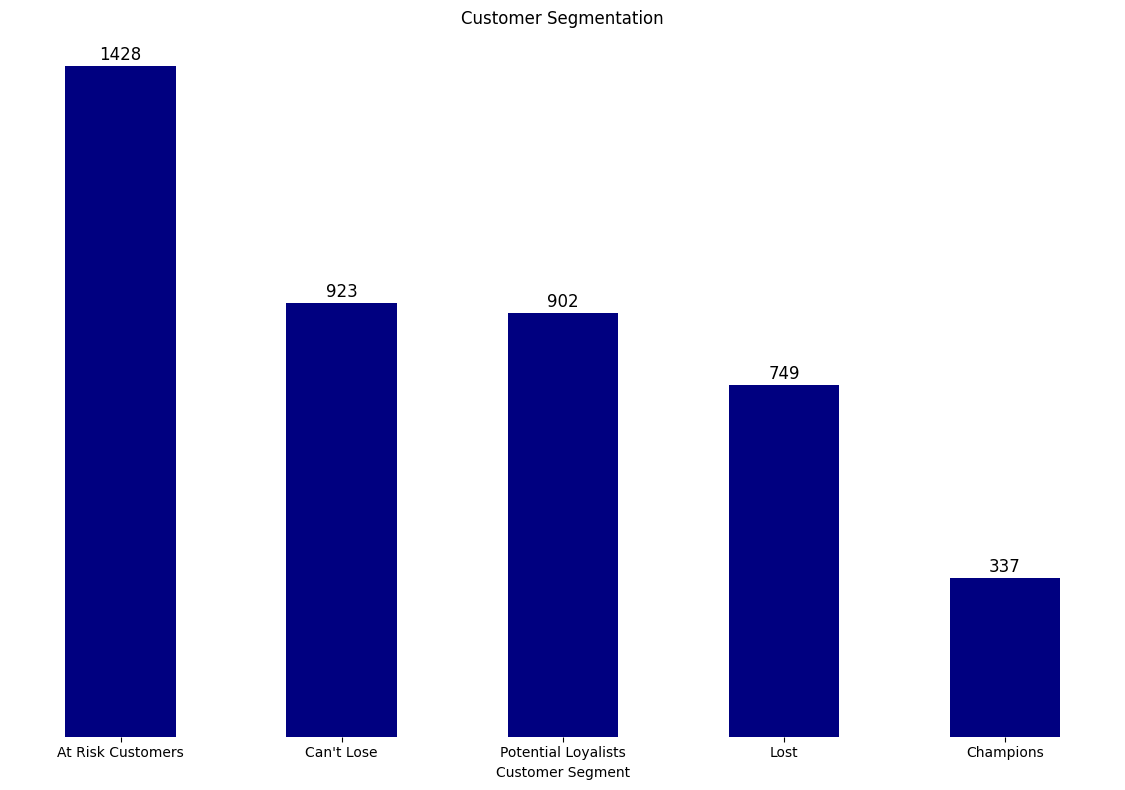

In [90]:
#visualizing the customer segment

#setting the figure size
plt.figure(figsize=(12,8))

#plotting the data
ax = rfm['customer_segment'].value_counts().plot(kind='bar', color='navy')

#customizing the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.xlabel('Customer Segment')
plt.xticks(rotation=0)
plt.ylabel('Customer Count')
plt.title('Customer Segmentation')
plt.tight_layout()
#annotating the plot
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2,
                 bar.get_height()), ha='center', va='center',
                size=12, xytext=(0, 8),
                textcoords='offset points')

plt.gca().get_yaxis().set_visible(False)
plt.show()


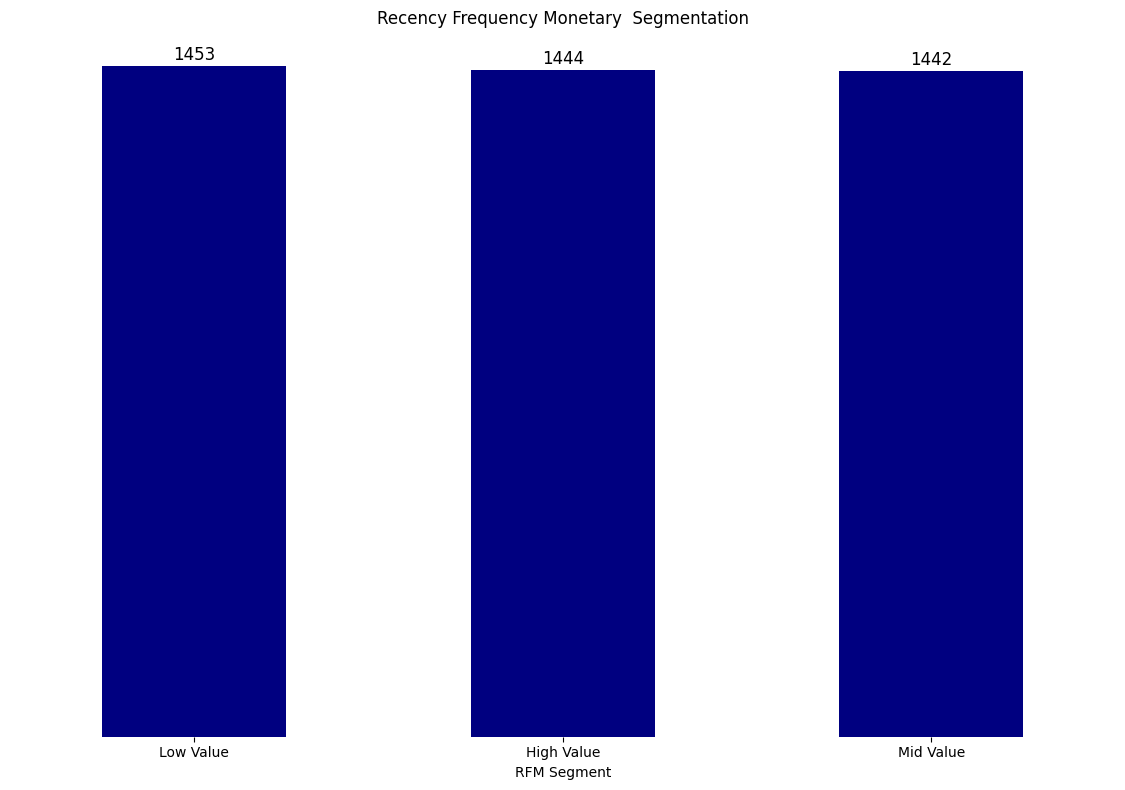

In [91]:
#visualizing rfm segment distribution
#setting the figure size
plt.figure(figsize=(12,8))

#plotting the data
ax = rfm['RFM_Segment'].value_counts().plot(kind='bar', color='navy')

#customizing the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.xlabel('RFM Segment')
plt.xticks(rotation=0)
plt.ylabel('Customer Count')
plt.title('Recency Frequency Monetary  Segmentation')
plt.tight_layout()
#annotating the plot
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2,
                 bar.get_height()), ha='center', va='center',
                size=12, xytext=(0, 8),
                textcoords='offset points')

plt.gca().get_yaxis().set_visible(False)
plt.show()

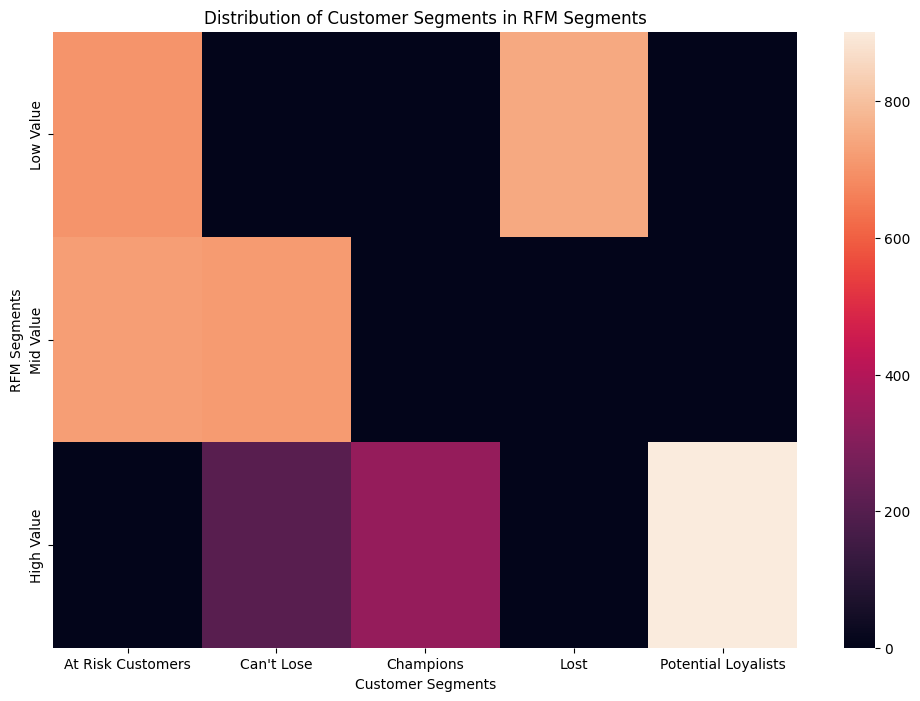

In [102]:
#visualizing customer segment distribution in rfm segments

#creating a pivot table of customer and rfm segment
import seaborn as sns
table = pd.crosstab(rfm['RFM_Segment'], rfm['customer_segment'])

#plotting a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(table)
plt.title('Distribution of Customer Segments in RFM Segments')
plt.ylabel('RFM Segments')
plt.xlabel('Customer Segments')

plt.show()

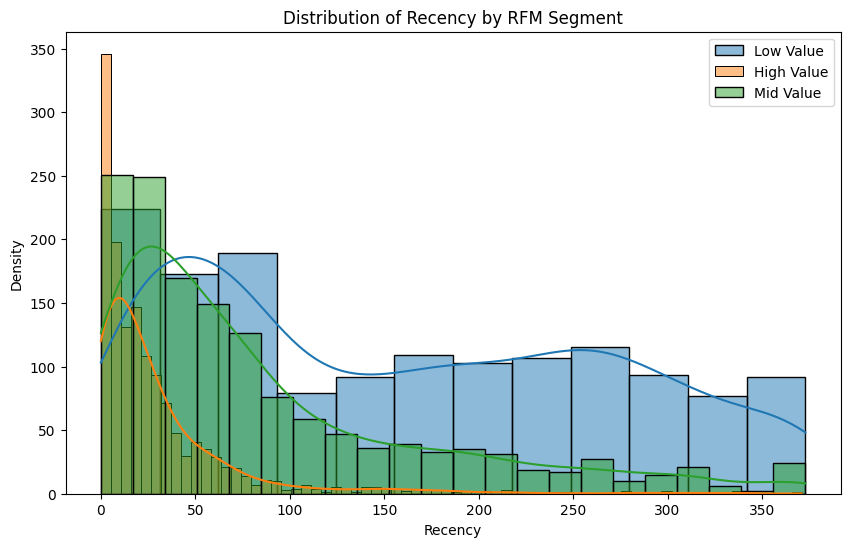

In [108]:
# Create a distplot of Monetary values by RFM_Segment
plt.figure(figsize=(10, 6))
for segment in rfm['RFM_Segment'].unique():
    sns.histplot(rfm[rfm['RFM_Segment'] == segment]['recency'], label=segment, kde=True)

plt.xlabel('Recency')
plt.ylabel('Density')
plt.title('Distribution of Recency by RFM Segment')
plt.legend()

# Display the plot
plt.show()